In [29]:
import numpy as np
import pandas as pd
import optmodels
from scipy.stats import random_correlation
import matplotlib.pyplot as plt

In [30]:
# get fake data

# specify eigenvalues
num_fake_stocks = 10
# eig_v = np.random.rand(num_fake_stocks)
eig_v = np.random.uniform(0.5, 1, num_fake_stocks)
eig_v[-1] = eig_v.shape[0] - np.sum(eig_v[:-1])

np.random.seed(666)
mean_true = np.random.uniform(0, 0.15, num_fake_stocks)
std_true = np.random.uniform(0.15, 0.5, num_fake_stocks).reshape(-1, 1)
corr_true = random_correlation.rvs(eig_v)
cov_true = np.outer(std_true, std_true) * corr_true

benchmark_weight_fake = np.ones(num_fake_stocks) / num_fake_stocks
maximum_deviation_fake = 1



In [7]:
# fake data

# MiniVar
MiniVar_weight_fake = optmodels.MiniVar(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# RiskParity
RiskParity_weight_fake = optmodels.RiskParity(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# MaxDiverse
MaxDiverse_weight_fake = optmodels.MaxDiverse(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

print("fake data results:")
print("MiniVar")
print(MiniVar_weight_fake)
print()
print("RiskParity")
print(RiskParity_weight_fake)
print()
print("MaxDiverse")
print(MaxDiverse_weight_fake)

Using license file C:\Users\73964\gurobi.lic
Academic license - for non-commercial use only
True
True
fake data results:
MiniVar
[0.1109959  0.04243979 0.17229682 0.01739293 0.09590471 0.04191956
 0.17972851 0.11973355 0.15988814 0.05970009]

RiskParity
[0.11690371 0.05695451 0.1316878  0.04785693 0.11019227 0.0591008
 0.14508161 0.10442391 0.13898243 0.08881604]

MaxDiverse
[0.12278149 0.05844585 0.15292475 0.03313069 0.1250693  0.06447796
 0.12848376 0.0861112  0.15334451 0.07523049]



Expected return for artificial data:

Benchmark
0.07475329008074727

MiniVar
0.06589026849475058

RiskParity
0.07045321109919872

MaxDiverse
0.07045321108174271


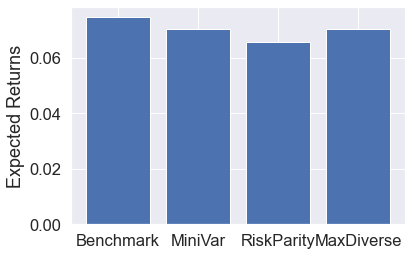

In [31]:
# Performance analysis
Benchmark_returns_fake = np.sum(benchmark_weight_fake*mean_true)
MiniVar_returns_fake = np.sum(MiniVar_weight_fake*mean_true)
RiskParity_returns_fake = np.sum(RiskParity_weight_fake*mean_true)
MaxDiverse_returns_fake = np.sum(MaxDiverse_weight_fake*mean_true)
print()
print("Expected return for artificial data:")
print()
print("Benchmark")
print(Benchmark_returns_fake)
print()
print("MiniVar")
print(MiniVar_returns_fake)
print()
print("RiskParity")
print(RiskParity_returns_fake)
print()
print("MaxDiverse") 
print(MaxDiverse_returns_fake)

ind = np.arange(4)
plt.bar(ind, [Benchmark_returns_fake, RiskParity_returns_fake, MiniVar_returns_fake, MaxDiverse_returns_fake])
plt.ylabel('Expected Returns')
plt.xticks(ind, ('Benchmark', 'MiniVar', 'RiskParity', 'MaxDiverse'))
plt.show()

In [32]:
#independent fake data, no correlation

num_fake_stocks = 10
# eig_v = np.random.rand(num_fake_stocks)
eig_v = np.random.uniform(0.5, 1, num_fake_stocks)
eig_v[-1] = eig_v.shape[0] - np.sum(eig_v[:-1])

np.random.seed(666)
mean_true = np.random.uniform(0, 0.15, num_fake_stocks)
std_true = np.random.uniform(0.15, 0.5, num_fake_stocks).reshape(-1, 1)
corr_true = random_correlation.rvs(eig_v)
corr_true = np.diag(np.diag(corr_true))
cov_true = np.outer(std_true, std_true) * corr_true
cov_true = np.diag(np.diag(cov_true)) #only keep diagonal entries

benchmark_weight_fake = np.ones(num_fake_stocks) / num_fake_stocks
maximum_deviation_fake = 1

# fake data

# MiniVar
MiniVar_weight_fake = optmodels.MiniVar(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# RiskParity
RiskParity_weight_fake = optmodels.RiskParity(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

# MaxDiverse
MaxDiverse_weight_fake = optmodels.MaxDiverse(
    cov_true, num_fake_stocks, benchmark_weight_fake, maximum_deviation_fake
)

print("fake data results:")
print("MiniVar")
print(MiniVar_weight_fake)
print()
print("RiskParity")
print(RiskParity_weight_fake)
print()
print("MaxDiverse")
print(MaxDiverse_weight_fake)

True
True
fake data results:
MiniVar
[0.10720653 0.03082334 0.10975931 0.03323261 0.08136532 0.029289
 0.22538924 0.14460701 0.14562945 0.09269819]

RiskParity
[0.10863167 0.05824862 0.10991741 0.06048226 0.09463798 0.05678035
 0.15751156 0.12616547 0.12661071 0.10101397]

MaxDiverse
[0.10863167 0.05824862 0.10991741 0.06048226 0.09463798 0.05678035
 0.15751156 0.12616547 0.12661071 0.10101397]



Expected return for artificial data:

Benchmark
0.07475329008074727

MiniVar
0.06589026849475058

RiskParity
0.07045321109919872

MaxDiverse
0.07045321108174271


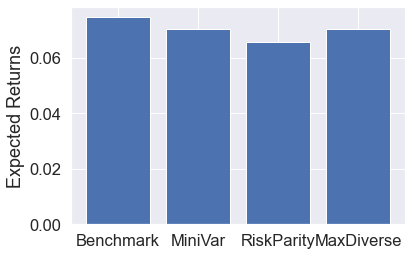

In [33]:
# Performance analysis (independent fake data, no correlation)
Benchmark_returns_fake = np.sum(benchmark_weight_fake*mean_true)
MiniVar_returns_fake = np.sum(MiniVar_weight_fake*mean_true)
RiskParity_returns_fake = np.sum(RiskParity_weight_fake*mean_true)
MaxDiverse_returns_fake = np.sum(MaxDiverse_weight_fake*mean_true)
print()
print("Expected return for artificial data:")
print()
print("Benchmark")
print(Benchmark_returns_fake)
print()
print("MiniVar")
print(MiniVar_returns_fake)
print()
print("RiskParity")
print(RiskParity_returns_fake)
print()
print("MaxDiverse") 
print(MaxDiverse_returns_fake)

ind = np.arange(4)
plt.bar(ind, [Benchmark_returns_fake, RiskParity_returns_fake, MiniVar_returns_fake, MaxDiverse_returns_fake])
plt.ylabel('Expected Returns')
plt.xticks(ind, ('Benchmark', 'MiniVar', 'RiskParity', 'MaxDiverse'))
plt.show()

In [34]:
# get actual data

path = "./output/data.xlsx"
price_table = pd.read_excel(path, sheet_name="stock_close", index_col="Date")
ret_table = pd.read_excel(path, sheet_name="stock_ret", index_col="Date")
cov_table = pd.read_excel(path, sheet_name="stock_cov", index_col=0)
corr_table = pd.read_excel(path, sheet_name="stock_corr", index_col=0)
sigma = np.sqrt(np.diag(cov_table))
num_stocks = price_table.shape[1]
benchmark_weight = np.ones(num_stocks) / num_stocks
maximum_deviation = 1

In [35]:
# actual data

# MiniVar
MiniVar_weight = optmodels.MiniVar(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# RiskParity
RiskParity_weight = optmodels.RiskParity(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# MaxDiverse
MaxDiverse_weight = optmodels.MaxDiverse(
    cov_table, num_stocks, benchmark_weight, maximum_deviation
)

# HRP
HRP_weight = optmodels.HRP(price_table)

print()
print("actual data results:")
print("MiniVar")
print(MiniVar_weight)
print()
print("RiskParity")
print(RiskParity_weight)
print()
print("MaxDiverse")
print(MaxDiverse_weight)
print()
print("HRP")
print(HRP_weight)

True
True

actual data results:
MiniVar
[8.45759534e-07 3.55628407e-02 9.37840816e-06 7.10292380e-05
 5.71863137e-03 4.27222038e-07 2.59336331e-02 4.11030976e-04
 7.33315193e-05 6.63195298e-06 1.19952749e-06 2.46817003e-06
 7.26341972e-07 7.85912920e-06 1.61224255e-01 1.75370928e-06
 2.58836059e-06 1.46202846e-01 4.81192940e-03 3.58918314e-07
 8.09636268e-06 2.00490455e-06 6.64371061e-06 4.10732940e-02
 1.43133026e-03 2.98925277e-01 8.59398775e-02 3.14581966e-02
 3.78543228e-02 1.23257193e-01]

RiskParity
[0.02088012 0.03113189 0.01630706 0.03951399 0.02700405 0.01929877
 0.03209645 0.0348438  0.03167443 0.02673488 0.02427465 0.025583
 0.02603393 0.02837486 0.05044127 0.02490512 0.0259899  0.05485436
 0.04075695 0.01910917 0.02981706 0.01967413 0.0288012  0.03974464
 0.02853663 0.06644917 0.04799801 0.03366673 0.05058731 0.05491648]

MaxDiverse
[5.24198258e-02 3.59448914e-02 4.15184356e-02 1.13491006e-17
 7.71467213e-02 1.87793978e-17 9.86848194e-02 1.95189577e-02
 6.94491006e-18 5.626


Expected return for actual data:

Benchmark
0.0005629614306209802

MiniVar
0.0003658511188654433

RiskParity
0.0005026426523047919

MaxDiverse
0.000593146528493116

HRP
0.00045468341303566003


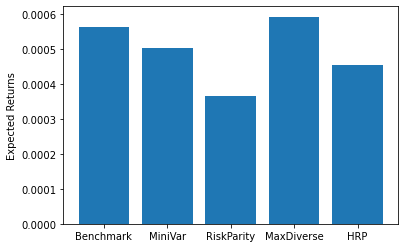

In [10]:
# Performance analysis
mean_actual = np.mean(ret_table, axis=0)
Benchmark_returns = np.sum(benchmark_weight*mean_actual)
MiniVar_returns = np.sum(MiniVar_weight*mean_actual)
RiskParity_returns = np.sum(RiskParity_weight*mean_actual)
MaxDiverse_returns = np.sum(MaxDiverse_weight*mean_actual)
HRP_returns = np.sum(HRP_weight*mean_actual)

print()
print("Expected return for actual data:")
print()
print("Benchmark")
print(Benchmark_returns)
print()
print("MiniVar")
print(MiniVar_returns)
print()
print("RiskParity")
print(RiskParity_returns)
print()
print("MaxDiverse")
print(MaxDiverse_returns)
print()
print("HRP")
print(HRP_returns)

ind = np.arange(5)
plt.bar(ind, [Benchmark_returns, RiskParity_returns, MiniVar_returns, MaxDiverse_returns, HRP_returns])
plt.ylabel('Expected Returns')
plt.xticks(ind, ('Benchmark', 'MiniVar', 'RiskParity', 'MaxDiverse', 'HRP'))
plt.show()

In [11]:
result = pd.DataFrame(
    [MiniVar_weight, RiskParity_weight, MaxDiverse_weight],
    columns=price_table.columns,
    index=["MiniVar", "RiskParity", "MaxDiverse"],
).T


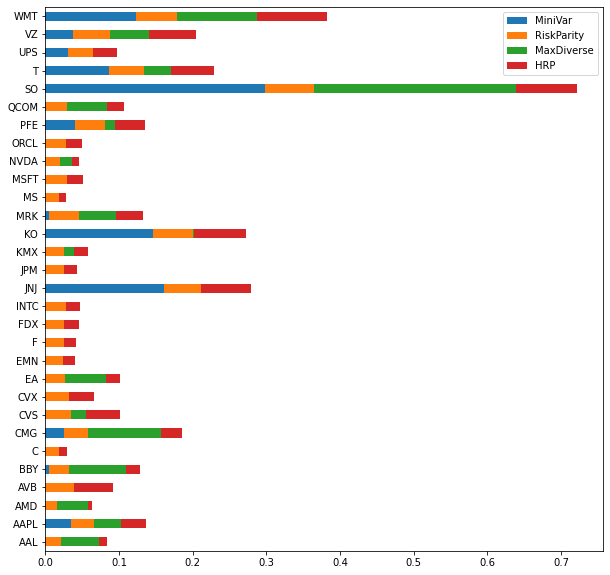

In [12]:
result["HRP"] = HRP_weight
result.plot.barh(stacked=True, figsize=(10, 10))
plt.show()

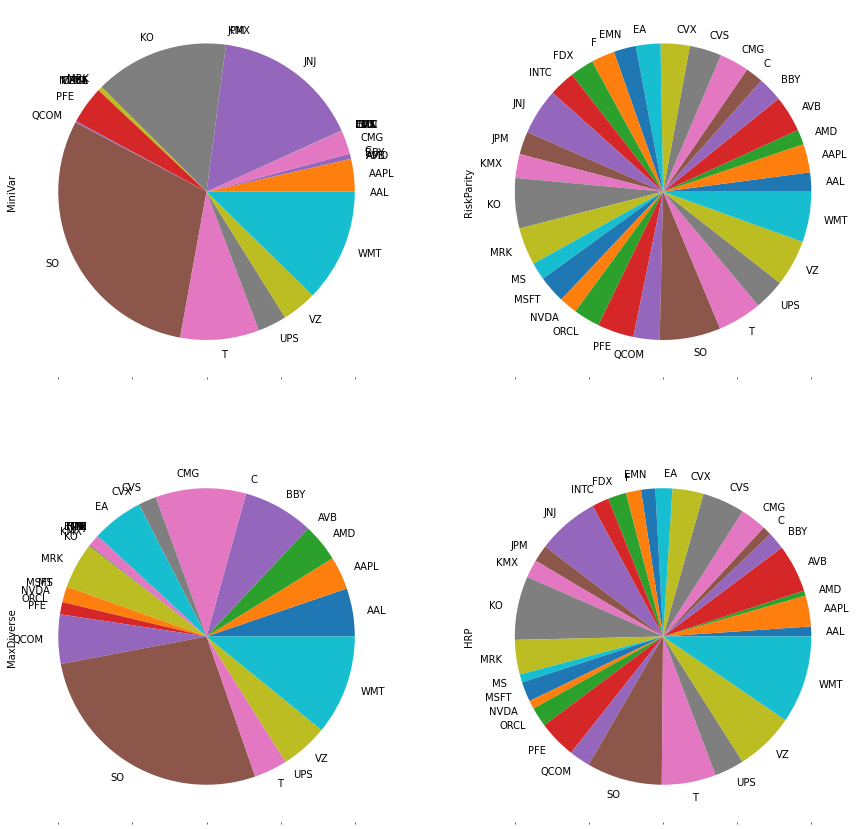

In [13]:
result.plot.pie(subplots=True, figsize=(15, 15), legend=False, layout=(2, 2))
plt.show()

In [14]:
result.index

Index(['AAL', 'AAPL', 'AMD', 'AVB', 'BBY', 'C', 'CMG', 'CVS', 'CVX', 'EA',
       'EMN', 'F', 'FDX', 'INTC', 'JNJ', 'JPM', 'KMX', 'KO', 'MRK', 'MS',
       'MSFT', 'NVDA', 'ORCL', 'PFE', 'QCOM', 'SO', 'T', 'UPS', 'VZ', 'WMT'],
      dtype='object')

In [15]:
import yfinance as yf
sec_map = {}
ticker_belongs = {ind:yf.Ticker(ind).info['sector'] for ind in result.index}
for ind in result.index:
    tick = yf.Ticker(ind)
    sec = tick.info['sector']
    if sec in sec_map:
        sec_map[sec].append(ind)
    else:
        sec_map[sec] = [ind]


In [16]:
sec_map

{'Industrials': ['AAL', 'FDX', 'UPS'],
 'Technology': ['AAPL', 'AMD', 'INTC', 'MSFT', 'NVDA', 'ORCL', 'QCOM'],
 'Real Estate': ['AVB'],
 'Consumer Cyclical': ['BBY', 'CMG', 'F', 'KMX'],
 'Financial Services': ['C', 'JPM', 'MS'],
 'Healthcare': ['CVS', 'JNJ', 'MRK', 'PFE'],
 'Energy': ['CVX'],
 'Communication Services': ['EA', 'T', 'VZ'],
 'Basic Materials': ['EMN'],
 'Consumer Defensive': ['KO', 'WMT'],
 'Utilities': ['SO']}

In [17]:
ticker_belongs

{'AAL': 'Industrials',
 'AAPL': 'Technology',
 'AMD': 'Technology',
 'AVB': 'Real Estate',
 'BBY': 'Consumer Cyclical',
 'C': 'Financial Services',
 'CMG': 'Consumer Cyclical',
 'CVS': 'Healthcare',
 'CVX': 'Energy',
 'EA': 'Communication Services',
 'EMN': 'Basic Materials',
 'F': 'Consumer Cyclical',
 'FDX': 'Industrials',
 'INTC': 'Technology',
 'JNJ': 'Healthcare',
 'JPM': 'Financial Services',
 'KMX': 'Consumer Cyclical',
 'KO': 'Consumer Defensive',
 'MRK': 'Healthcare',
 'MS': 'Financial Services',
 'MSFT': 'Technology',
 'NVDA': 'Technology',
 'ORCL': 'Technology',
 'PFE': 'Healthcare',
 'QCOM': 'Technology',
 'SO': 'Utilities',
 'T': 'Communication Services',
 'UPS': 'Industrials',
 'VZ': 'Communication Services',
 'WMT': 'Consumer Defensive'}

In [18]:
result['sector']=pd.Series(ticker_belongs)

In [19]:
result.groupby('sector').sum()

,MiniVar,RiskParity,MaxDiverse,HRP
sector,,,,
Basic Materials,0.000001,0.024275,2.666295e-17,0.015516
Communication Services,0.123801,0.125320,1.443392e-01,0.142040
Consumer Cyclical,0.031657,0.110673,1.884314e-01,0.083761
Consumer Defensive,0.269460,0.109771,1.101950e-01,0.164854
Energy,0.000073,0.031674,6.944910e-18,0.033824
Financial Services,0.000003,0.063313,7.954725e-17,0.037213
Healthcare,0.207521,0.165787,8.279063e-02,0.192714
Industrials,0.031460,0.080581,5.241983e-02,0.063110
Real Estate,0.000071,0.039514,1.134910e-17,0.052228


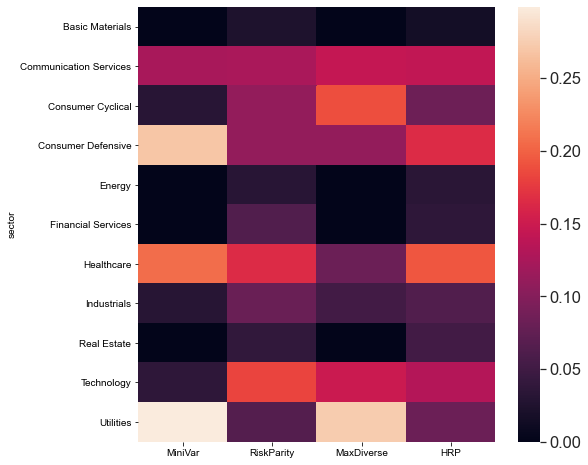

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1.5)
sns.heatmap(result.groupby('sector').sum(), ax=ax)
plt.show()